In [ ]:
!pip install torch torchvision numpy opencv-python dlib pillow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
!mkdir -p data/CelebA
!unzip /content/img_align_celeba.zip -d data/CelebA


Streaming output truncated to the last 5000 lines.
  inflating: data/CelebA/197600.jpg  
  inflating: data/CelebA/197601.jpg  
  inflating: data/CelebA/197602.jpg  
  inflating: data/CelebA/197603.jpg  
  inflating: data/CelebA/197604.jpg  
  inflating: data/CelebA/197605.jpg  
  inflating: data/CelebA/197606.jpg  
  inflating: data/CelebA/197607.jpg  
  inflating: data/CelebA/197608.jpg  
  inflating: data/CelebA/197609.jpg  
  inflating: data/CelebA/197610.jpg  
  inflating: data/CelebA/197611.jpg  
  inflating: data/CelebA/197612.jpg  
  inflating: data/CelebA/197613.jpg  
  inflating: data/CelebA/197614.jpg  
  inflating: data/CelebA/197615.jpg  
  inflating: data/CelebA/197616.jpg  
  inflating: data/CelebA/197617.jpg  
  inflating: data/CelebA/197618.jpg  
  inflating: data/CelebA/197619.jpg  
  inflating: data/CelebA/197620.jpg  
  inflating: data/CelebA/197621.jpg  
  inflating: data/CelebA/197622.jpg  
  inflating: data/CelebA/197623.jpg  
  inflating: data/CelebA/197624.jpg  

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2025-04-25 22:11:48--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-04-25 22:11:48--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  37.6MB/s    in 1.6s    

2025-04-25 22:11:50 (37.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!pip install face-alignment


In [30]:
import face_alignment
import torch
import cv2, os, numpy as np

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device=device)

input_dir = "data/CelebA"
landmarks_dir = "data/CelebA/landmarks_fan"
os.makedirs(landmarks_dir, exist_ok=True)

# Limit to 10,000 images
all_imgs = sorted(os.listdir(input_dir))[:10000]
total = len(all_imgs)
processed = 0

# Process images with minimal output
for i, img_name in enumerate(all_imgs):
    img_path = os.path.join(input_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    preds = fa.get_landmarks_from_image(img)
    if preds is None:
        continue

    landmark_img = np.zeros(img.shape[:2], dtype=np.uint8)
    points = preds[0].astype(int)
    selected_points = list(range(17)) + list(range(48, 61)) + list(range(27, 31))
    for idx in selected_points:
        x, y = points[idx]
        cv2.circle(landmark_img, (x, y), 1, 255, -1)

    cv2.imwrite(os.path.join(landmarks_dir, img_name), landmark_img)
    processed += 1

    # Print progress every 100 images
    if processed % 100 == 0 or i == total - 1:
        percent = (processed / total) * 100
        print(f"Processed {processed}/{total} ({percent:.2f}%)")

print(f"✅ Done! Total images processed: {processed}/{total}")


Processed 100/10000 (1.00%)
Processed 200/10000 (2.00%)
Processed 300/10000 (3.00%)
Processed 400/10000 (4.00%)
Processed 500/10000 (5.00%)
Processed 600/10000 (6.00%)
Processed 700/10000 (7.00%)
Processed 800/10000 (8.00%)
Processed 900/10000 (9.00%)
Processed 1000/10000 (10.00%)
Processed 1100/10000 (11.00%)
Processed 1200/10000 (12.00%)
Processed 1300/10000 (13.00%)
Processed 1400/10000 (14.00%)
Processed 1500/10000 (15.00%)
Processed 1600/10000 (16.00%)
Processed 1700/10000 (17.00%)
Processed 1800/10000 (18.00%)
Processed 1900/10000 (19.00%)
Processed 2000/10000 (20.00%)
Processed 2100/10000 (21.00%)
Processed 2200/10000 (22.00%)
Processed 2300/10000 (23.00%)
Processed 2400/10000 (24.00%)
Processed 2500/10000 (25.00%)
Processed 2600/10000 (26.00%)
Processed 2700/10000 (27.00%)
Processed 2800/10000 (28.00%)
Processed 2900/10000 (29.00%)
Processed 3000/10000 (30.00%)
Processed 3100/10000 (31.00%)
Processed 3200/10000 (32.00%)
Processed 3300/10000 (33.00%)
Processed 3400/10000 (34.00%

In [34]:
import face_alignment
import torch
import cv2, os, numpy as np

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device=device)

input_dir = "data/CelebA"   # original images
masked_dir = "data/CelebA/masked_bg"         # output dir
os.makedirs(masked_dir, exist_ok=True)

# Process only first 10,000 images
all_imgs = sorted(os.listdir(input_dir))[:10000]
total = len(all_imgs)
processed = 0

for i, img_name in enumerate(all_imgs):
    img_path = os.path.join(input_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    preds = fa.get_landmarks_from_image(img)
    if preds is None:
        continue

    points = preds[0].astype(int)

    # Face region (jawline + eyebrows)
    face_indices = list(range(0, 17)) + list(range(17, 27))
    face_polygon = cv2.convexHull(points[face_indices])

    # Create mask and apply to image
    mask = np.ones(img.shape[:2], dtype=np.uint8) * 255
    cv2.fillConvexPoly(mask, face_polygon, 0)  # black out face area
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    # Save the masked image
    cv2.imwrite(os.path.join(masked_dir, img_name), masked_img)
    processed += 1

    # Print progress every 100
    if processed % 100 == 0 or i == total - 1:
        percent = (processed / total) * 100
        print(f"Processed {processed}/{total} ({percent:.2f}%)")

print(f"✅ Done! Total masked background images: {processed}/{total}")


Processed 100/10000 (1.00%)
Processed 200/10000 (2.00%)
Processed 300/10000 (3.00%)
Processed 400/10000 (4.00%)
Processed 500/10000 (5.00%)
Processed 600/10000 (6.00%)
Processed 700/10000 (7.00%)
Processed 800/10000 (8.00%)
Processed 900/10000 (9.00%)
Processed 1000/10000 (10.00%)
Processed 1100/10000 (11.00%)
Processed 1200/10000 (12.00%)
Processed 1300/10000 (13.00%)
Processed 1400/10000 (14.00%)
Processed 1500/10000 (15.00%)
Processed 1600/10000 (16.00%)
Processed 1700/10000 (17.00%)
Processed 1800/10000 (18.00%)
Processed 1900/10000 (19.00%)
Processed 2000/10000 (20.00%)
Processed 2100/10000 (21.00%)
Processed 2200/10000 (22.00%)
Processed 2300/10000 (23.00%)
Processed 2400/10000 (24.00%)
Processed 2500/10000 (25.00%)
Processed 2600/10000 (26.00%)
Processed 2700/10000 (27.00%)
Processed 2800/10000 (28.00%)
Processed 2900/10000 (29.00%)
Processed 3000/10000 (30.00%)
Processed 3100/10000 (31.00%)
Processed 3200/10000 (32.00%)
Processed 3300/10000 (33.00%)
Processed 3400/10000 (34.00%

In [35]:
import torch
import torch.nn as nn

class GeneratorUNet(nn.Module):
    def __init__(self, identity_dim=100):
        super().__init__()
        self.identity_dim = identity_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(4, 64, kernel_size=4, stride=2, padding=1),  # 4 channels: landmark + masked image
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256 + self.identity_dim, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),  # 3 channels output (RGB face)
            nn.Tanh()
        )

    def forward(self, landmarks, masked_bg, identity_vector):
        # Concatenate landmark and masked background
        x = torch.cat((landmarks, masked_bg), dim=1)  # [batch_size, 4, H, W]

        x_enc = self.encoder(x)  # encode

        # Expand identity vector to match spatial dimensions
        identity_expanded = identity_vector.view(identity_vector.size(0), self.identity_dim, 1, 1)
        identity_expanded = identity_expanded.expand(-1, -1, x_enc.size(2), x_enc.size(3))

        # Concatenate identity into bottleneck
        combined = torch.cat((x_enc, identity_expanded), dim=1)

        # Decode to output image
        output = self.decoder(combined)
        return output


In [36]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.main = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # Input: 3 channels (RGB)
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()  # Output probability real/fake
        )

    def forward(self, x):
        return self.main(x)


In [37]:
import torch
import torch.nn as nn

class SiameseNetwork(nn.Module):
    def __init__(self, embedding_dim=128):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # Input: RGB image
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True)
        )

        # Final fully connected layer to project to embedding space
        self.fc = nn.Linear(256 * 16 * 16, embedding_dim)  # Assuming input 128x128

    def forward_once(self, x):
        out = self.cnn(x)
        out = out.view(out.size(0), -1)  # flatten
        out = self.fc(out)
        return out

    def forward(self, x1, x2):
        out1 = self.forward_once(x1)
        out2 = self.forward_once(x2)
        return out1, out2


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate models
generator = GeneratorUNet(identity_dim=100).to(device)
discriminator = Discriminator().to(device)
siamese = SiameseNetwork(embedding_dim=128).to(device)

# Loss functions
criterion_GAN = nn.MSELoss()  # For generator/discriminator
criterion_contrastive = nn.CosineEmbeddingLoss()  # For siamese network

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=1e-5, betas=(0.5, 0.9))
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-5, betas=(0.5, 0.9))
optimizer_siamese = optim.Adam(siamese.parameters(), lr=1e-5, betas=(0.5, 0.9))


In [68]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import torch
import os

class CIAGANDataset(Dataset):
    def __init__(self, image_dir, landmark_dir, masked_dir, identity_dim=100, limit=10000):
        self.image_dir = image_dir
        self.landmark_dir = landmark_dir
        self.masked_dir = masked_dir
        self.identity_dim = identity_dim

        # ✅ Replaced this line
        all_files = sorted(os.listdir(image_dir))[:limit]
        self.filenames = [
            f for f in all_files
            if os.path.exists(os.path.join(self.landmark_dir, f)) and os.path.exists(os.path.join(self.masked_dir, f))
        ]

        # Transforms for RGB images
        self.rgb_transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            transforms.Normalize([0.5]*3, [0.5]*3)
        ])

        # Transforms for grayscale landmark images
        self.gray_transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5])
        ])

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]

        # Load images
        real_image = Image.open(os.path.join(self.image_dir, filename)).convert("RGB")
        masked_bg = Image.open(os.path.join(self.masked_dir, filename)).convert("RGB")
        landmark = Image.open(os.path.join(self.landmark_dir, filename)).convert("L")

        # Apply transforms
        real_image = self.rgb_transform(real_image)
        masked_bg = self.rgb_transform(masked_bg)
        landmark = self.gray_transform(landmark)

        # Identity vector: random Gaussian vector (can be one-hot if needed)
        identity_vector = torch.randn(self.identity_dim)

        # GAN labels
        real_label = torch.ones(1)
        fake_label = torch.zeros(1)

        # Similarity label: assume 1 (same identity), for contrastive loss
        similarity_label = torch.tensor([1.0])

        return landmark, masked_bg, real_image, identity_vector, real_label, fake_label, similarity_label


In [69]:
from torch.utils.data import DataLoader

dataset = CIAGANDataset(
    image_dir="data/CelebA",
    landmark_dir="data/CelebA/landmarks_fan",
    masked_dir="data/CelebA/masked_bg",
    identity_dim=100,
    limit=10000  # faster testing
)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)



In [70]:
if (epoch + 1) % 10 == 0:
    torch.save(generator.state_dict(), f'checkpoints/generator_epoch{epoch+1}.pth')
    torch.save(discriminator.state_dict(), f'checkpoints/discriminator_epoch{epoch+1}.pth')
    torch.save(siamese.state_dict(), f'checkpoints/siamese_epoch{epoch+1}.pth')


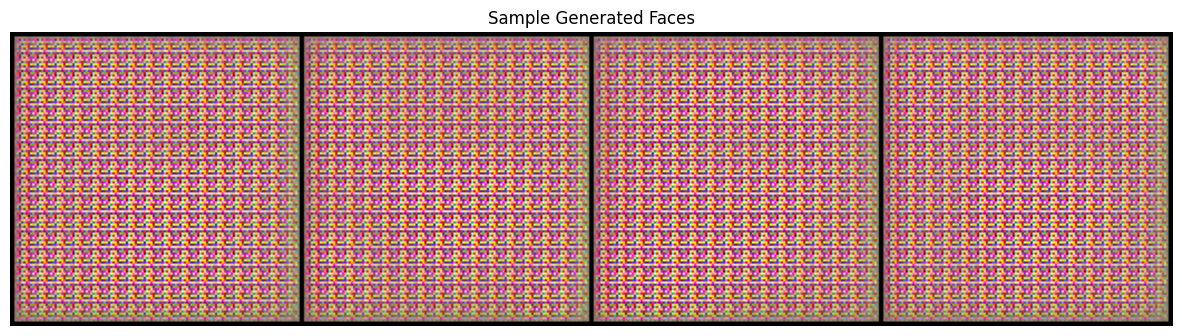

In [71]:
import matplotlib.pyplot as plt
import torchvision

# In validation or after training step
with torch.no_grad():
    generator.eval()
    sample = next(iter(dataloader))
    landmarks, masked_bg, real_images, identity_vectors, *_ = sample
    landmarks, masked_bg, identity_vectors = landmarks.to(device), masked_bg.to(device), identity_vectors.to(device)

    gen_imgs = generator(landmarks, masked_bg, identity_vectors)
    grid = torchvision.utils.make_grid(gen_imgs[:4].cpu(), normalize=True)

    plt.figure(figsize=(15, 15))
    plt.imshow(grid.permute(1, 2, 0))
    plt.title("Sample Generated Faces")
    plt.axis('off')
    plt.show()


In [75]:
import os
os.makedirs("checkpoints", exist_ok=True)

num_epochs = 50

for epoch in range(num_epochs):
    generator.train()
    discriminator.train()
    siamese.train()

    for batch in dataloader:
        landmarks, masked_bg, real_images, identity_vectors, real_labels, fake_labels, similarity_labels = batch
        landmarks = landmarks.to(device)
        masked_bg = masked_bg.to(device)
        real_images = real_images.to(device)
        identity_vectors = identity_vectors.to(device)
        similarity_labels = similarity_labels.to(device)

        # ===== Generator =====
        optimizer_G.zero_grad()
        gen_images = generator(landmarks, masked_bg, identity_vectors)
        validity = discriminator(gen_images)
        real_label = torch.ones_like(validity)
        g_loss = criterion_GAN(validity, real_label)
        g_loss.backward()
        optimizer_G.step()

        # ===== Discriminator =====
        optimizer_D.zero_grad()
        real_pred = discriminator(real_images)
        fake_pred = discriminator(gen_images.detach())
        real_label = torch.ones_like(real_pred)
        fake_label = torch.zeros_like(fake_pred)
        real_loss = criterion_GAN(real_pred, real_label)
        fake_loss = criterion_GAN(fake_pred, fake_label)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # ===== Siamese =====
        optimizer_siamese.zero_grad()
        real_embed, fake_embed = siamese(real_images, gen_images.detach())
        id_loss = criterion_contrastive(real_embed, fake_embed, similarity_labels.view(-1).to(device))
        id_loss.backward()
        optimizer_siamese.step()

    # ===== Save Checkpoints Every 10 Epochs =====
    if (epoch + 1) % 10 == 0:
        torch.save(generator.state_dict(), f'checkpoints/generator_epoch{epoch+1}.pth')
        torch.save(discriminator.state_dict(), f'checkpoints/discriminator_epoch{epoch+1}.pth')
        torch.save(siamese.state_dict(), f'checkpoints/siamese_epoch{epoch+1}.pth')

    # ===== Print Epoch Summary =====
    print(f"Epoch [{epoch+1}/{num_epochs}] | G_loss: {g_loss.item():.4f} | D_loss: {d_loss.item():.4f} | ID_loss: {id_loss.item():.4f}")


Epoch [1/50] | G_loss: 0.3119 | D_loss: 0.2194 | ID_loss: 0.0000
Epoch [2/50] | G_loss: 0.2898 | D_loss: 0.2473 | ID_loss: 0.0000
Epoch [3/50] | G_loss: 0.2436 | D_loss: 0.2508 | ID_loss: -0.0000
Epoch [4/50] | G_loss: 0.1671 | D_loss: 0.2687 | ID_loss: 0.0000
Epoch [5/50] | G_loss: 0.2466 | D_loss: 0.2502 | ID_loss: 0.0000
Epoch [6/50] | G_loss: 0.2348 | D_loss: 0.2864 | ID_loss: 0.0000
Epoch [7/50] | G_loss: 0.3681 | D_loss: 0.2084 | ID_loss: 0.0000
Epoch [8/50] | G_loss: 0.3149 | D_loss: 0.2292 | ID_loss: 0.0000
Epoch [9/50] | G_loss: 0.2115 | D_loss: 0.3686 | ID_loss: -0.0000
Epoch [10/50] | G_loss: 0.2973 | D_loss: 0.2285 | ID_loss: -0.0000
Epoch [11/50] | G_loss: 0.2256 | D_loss: 0.2692 | ID_loss: 0.0000
Epoch [12/50] | G_loss: 0.2514 | D_loss: 0.2369 | ID_loss: 0.0000
Epoch [13/50] | G_loss: 0.3649 | D_loss: 0.2382 | ID_loss: -0.0000
Epoch [14/50] | G_loss: 0.3160 | D_loss: 0.2280 | ID_loss: 0.0000
Epoch [15/50] | G_loss: 0.2362 | D_loss: 0.2307 | ID_loss: 0.0000
Epoch [16/50] |

In [76]:
generator.load_state_dict(torch.load("checkpoints/generator_epoch50.pth"))
generator.eval()


GeneratorUNet(
  (encoder): Sequential(
    (0): Conv2d(4, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(356, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
  )
)

In [77]:
sample = next(iter(dataloader))
landmarks, masked_bg, real_images, identity_vectors, *_ = sample

# Move to device
landmarks = landmarks.to(device)
masked_bg = masked_bg.to(device)
identity_vectors = identity_vectors.to(device)


In [78]:
with torch.no_grad():
    gen_imgs = generator(landmarks, masked_bg, identity_vectors)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


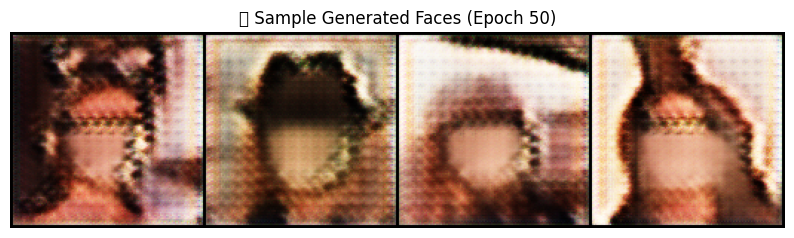

In [79]:
import matplotlib.pyplot as plt
import torchvision

grid = torchvision.utils.make_grid(gen_imgs[:4].cpu(), normalize=True)

plt.figure(figsize=(10, 10))
plt.imshow(grid.permute(1, 2, 0))
plt.title("🔄 Sample Generated Faces (Epoch 50)")
plt.axis("off")
plt.show()


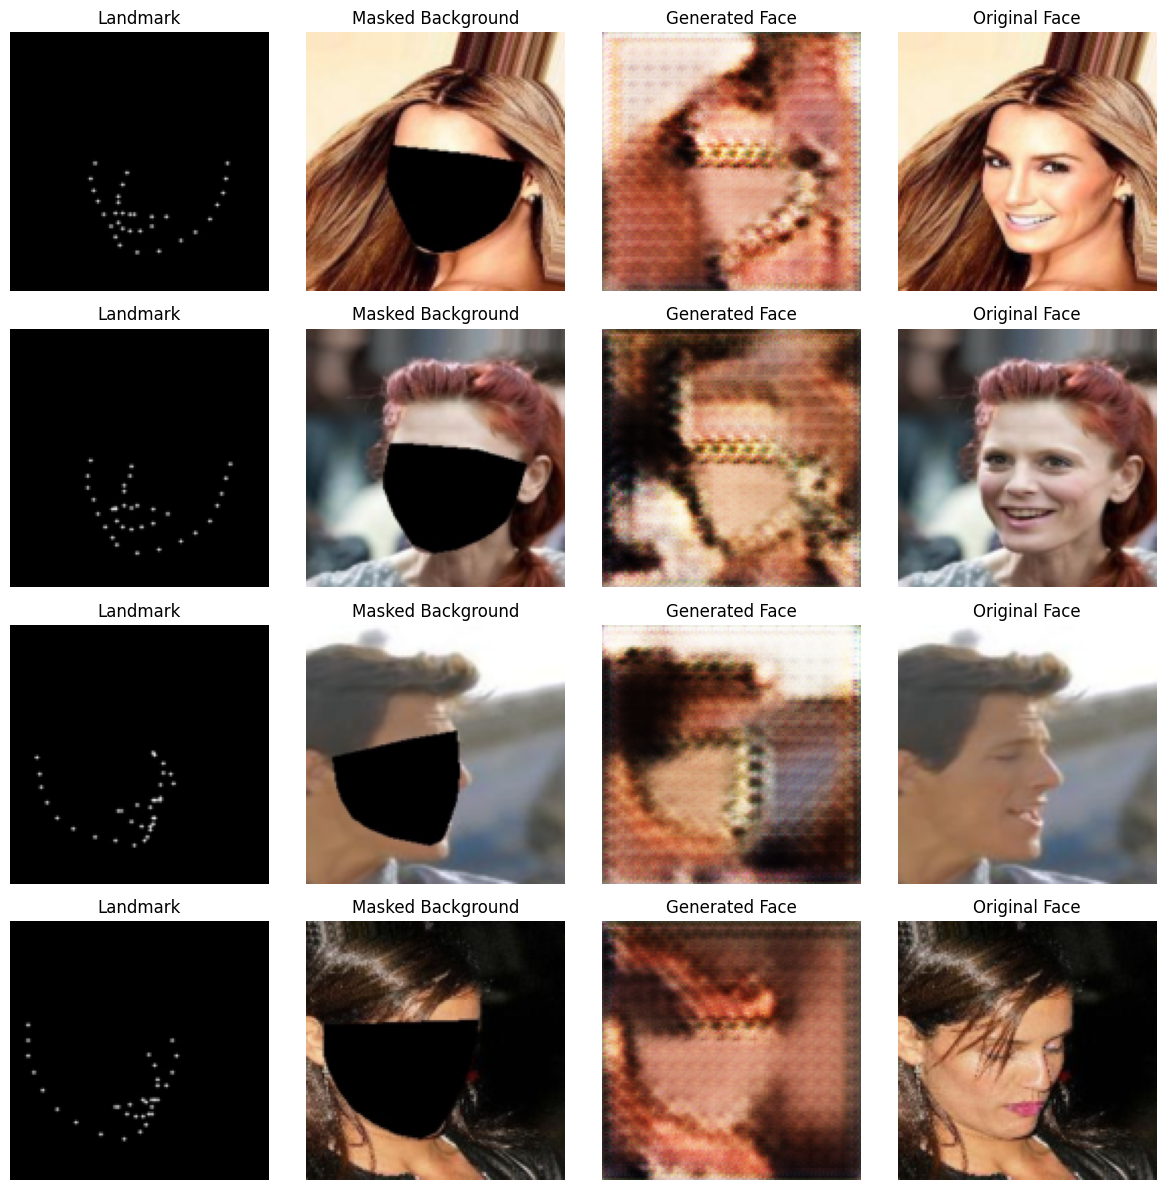

In [82]:
import matplotlib.pyplot as plt

def show_triplets(dataset, generator, num_samples=4):
    generator.eval()
    fig, axs = plt.subplots(num_samples, 4, figsize=(12, 3 * num_samples))

    for i in range(num_samples):
        sample = dataset[i]
        landmark, masked_bg, real_image, identity_vector, *_ = sample

        # Add batch dimension and move to device
        landmark = landmark.unsqueeze(0).to(device)
        masked_bg = masked_bg.unsqueeze(0).to(device)
        identity_vector = identity_vector.unsqueeze(0).to(device)

        with torch.no_grad():
            gen_image = generator(landmark, masked_bg, identity_vector).cpu().squeeze(0)

        def tensor_to_img(t):
            if t.dim() == 4:
                t = t.squeeze(0)
            return t.permute(1, 2, 0).numpy() * 0.5 + 0.5  # unnormalize


        landmark_vis = landmark.cpu().squeeze(0).expand(3, -1, -1)  # fix here
        axs[i, 0].imshow(tensor_to_img(landmark_vis))
        axs[i, 0].set_title("Landmark")
        axs[i, 1].imshow(tensor_to_img(masked_bg.cpu()))
        axs[i, 1].set_title("Masked Background")
        axs[i, 2].imshow(tensor_to_img(gen_image))
        axs[i, 2].set_title("Generated Face")
        axs[i, 3].imshow(tensor_to_img(real_image))
        axs[i, 3].set_title("Original Face")

        for ax in axs[i]:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
show_triplets(dataset, generator, num_samples=4)


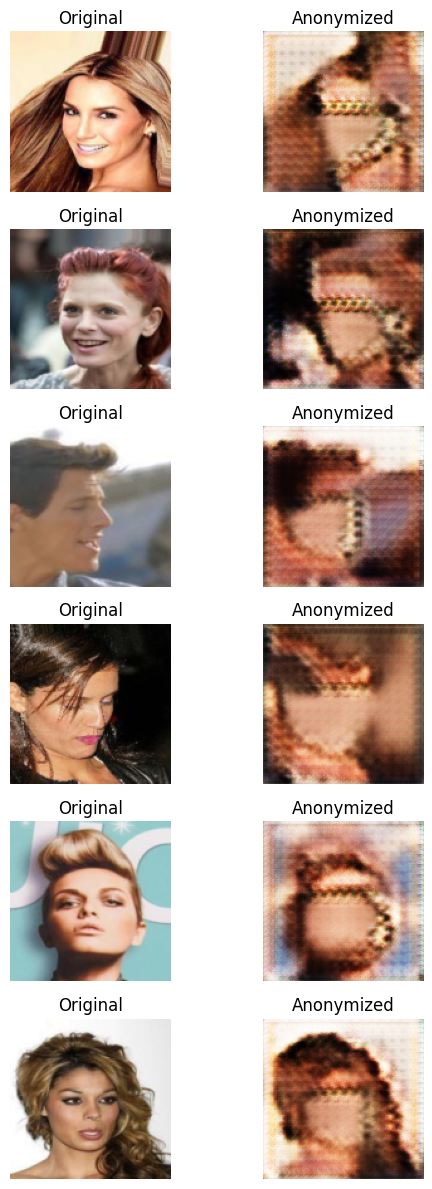

In [86]:
import matplotlib.pyplot as plt
import torchvision

def show_before_after(dataset, generator, num_samples=8):
    generator.eval()
    fig, axs = plt.subplots(num_samples, 2, figsize=(6, num_samples * 2))

    for i in range(num_samples):
        sample = dataset[i]
        landmark, masked_bg, real_image, identity_vector, *_ = sample

        landmark = landmark.unsqueeze(0).to(device)
        masked_bg = masked_bg.unsqueeze(0).to(device)
        identity_vector = identity_vector.unsqueeze(0).to(device)

        with torch.no_grad():
            fake = generator(landmark, masked_bg, identity_vector).cpu().squeeze(0)

        def tensor_to_img(t):
            return t.permute(1, 2, 0).numpy() * 0.5 + 0.5

        axs[i, 0].imshow(tensor_to_img(real_image))
        axs[i, 0].set_title("Original")
        axs[i, 1].imshow(tensor_to_img(fake))
        axs[i, 1].set_title("Anonymized")

        for ax in axs[i]:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Usage
show_before_after(dataset, generator, num_samples=6)


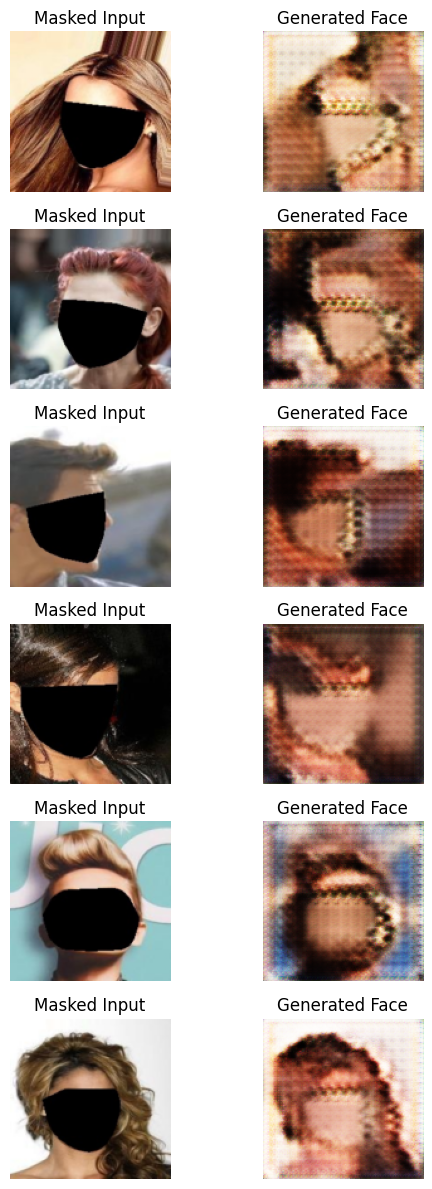

In [89]:
def show_masked_vs_generated(dataset, generator, num_samples=6):
    generator.eval()
    fig, axs = plt.subplots(num_samples, 2, figsize=(6, num_samples * 2))

    for i in range(num_samples):
        landmark, masked_bg, real_image, identity_vector, *_ = dataset[i]

        landmark = landmark.unsqueeze(0).to(device)
        masked_bg = masked_bg.unsqueeze(0).to(device)
        identity_vector = identity_vector.unsqueeze(0).to(device)

        with torch.no_grad():
            gen = generator(landmark, masked_bg, identity_vector).cpu().squeeze(0)

        def to_img(t):
            if t.dim() == 4:
                t = t.squeeze(0)
            return t.cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5  # Move to CPU before converting to numpy



        axs[i, 0].imshow(to_img(masked_bg))
        axs[i, 0].set_title("Masked Input")
        axs[i, 1].imshow(to_img(gen))
        axs[i, 1].set_title("Generated Face")

        for ax in axs[i]:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Usage:
show_masked_vs_generated(dataset, generator)


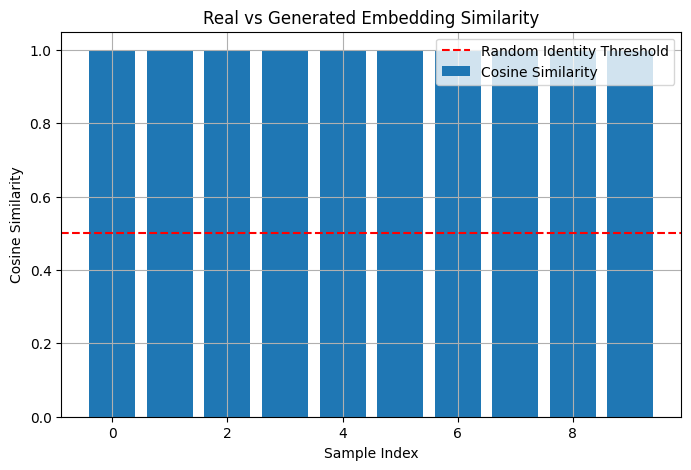

In [96]:
def plot_siamese_scores(dataset, generator, siamese, num_samples=10):
    siamese.eval()
    generator.eval()

    scores = []

    for i in range(num_samples):
        landmark, masked_bg, real_image, identity_vector, *_ = dataset[i]

        landmark = landmark.unsqueeze(0).to(device)
        masked_bg = masked_bg.unsqueeze(0).to(device)
        real_image = real_image.unsqueeze(0).to(device)
        identity_vector = identity_vector.unsqueeze(0).to(device)

        with torch.no_grad():
            fake = generator(landmark, masked_bg, identity_vector)
            real_embed, fake_embed = siamese(real_image, fake)
            cos_sim = torch.cosine_similarity(real_embed, fake_embed).item()
            scores.append(cos_sim)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(range(num_samples), scores, label="Cosine Similarity")  # ✅ Added label
    plt.axhline(0.5, color='r', linestyle='--', label='Random Identity Threshold')
    plt.xlabel("Sample Index")
    plt.ylabel("Cosine Similarity")
    plt.title("Real vs Generated Embedding Similarity")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_siamese_scores(dataset, generator, siamese, num_samples=10)

